<ipython-input-12-2f500f621b0d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['time_passed'] = tempo_passado


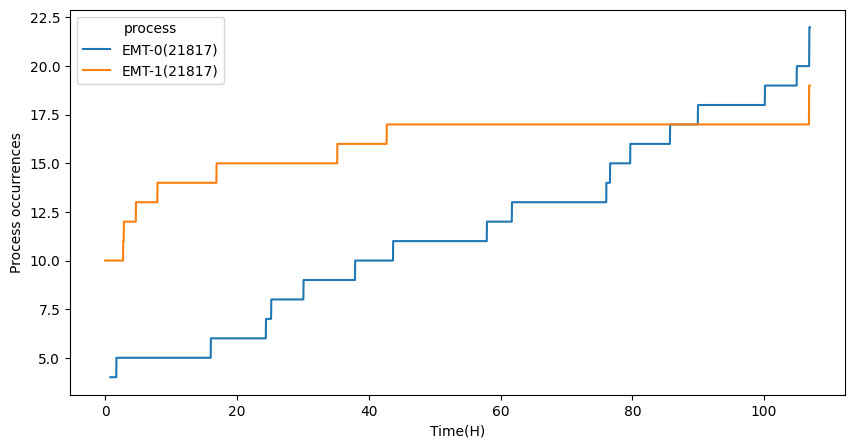

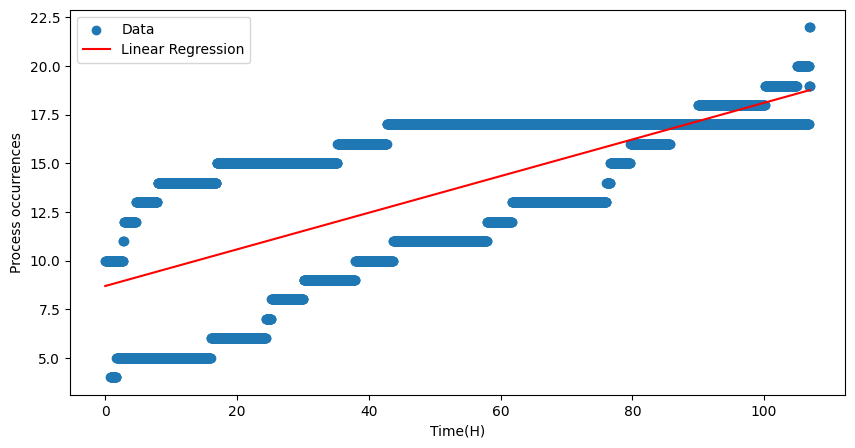

                             OLS Regression Results                            
Dep. Variable:     process_occurrences   R-squared:                       0.505
Model:                             OLS   Adj. R-squared:                  0.505
Method:                  Least Squares   F-statistic:                     6532.
Date:                 Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                         01:11:41   Log-Likelihood:                -15812.
No. Observations:                 6395   AIC:                         3.163e+04
Df Residuals:                     6393   BIC:                         3.164e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6906      0.072    120.52

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf

def ler_csv():
  """
    Read CSV file and return DataFrame.
  """
  try:
    return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fragmentation.csv", delimiter=";", header=0)

  except FileNotFoundError:
    print("File not found.")
    return None

  except Exception as e:
      print("An error occurred:", str(e))
      return None

def converter_coluna_datetime_para_datetime64(data_frame):
  """
  Preprocess DataFrame:
  - Convert 'datetime' column to datetime64[ns]
  - Set 'datetime' column as index
  """
  if not data_frame.empty and 'datetime' in data_frame.columns:
        data_frame['datetime'] = pd.to_datetime(data_frame['datetime'])
        data_frame.set_index('datetime', inplace=True)
  else:
      print("DataFrame is empty or does not contain 'datetime' column.")
  return data_frame


def total_segundos_inicial_final(data_frame):
  tempo_passado = (data_frame.index - data_frame.index[0]).total_seconds() / 3600
  data_frame['time_passed'] = tempo_passado

  return data_frame.set_index(data_frame['time_passed'])


def data_frame_filtrado(data_frame, ocorrencia_minima_processos):
  """
    Filter DataFrame based on minimum occurrences of processes.
  """
  return data_frame[data_frame['process_occurrences'] >= ocorrencia_minima_processos]


def pivot_data_frame(data_frame_filtrado):
  """
    Visualize DataFrame: pivot and plot.
  """
  data_frame_pivot = data_frame_filtrado.pivot(columns='process', values='process_occurrences')
  data_frame_pivot.plot(figsize=[10, 5], ylabel='Process occurrences', xlabel='Time(H)')
  plt.show()


def regressao_linear(data_frame):
  """
    Perform linear regression on DataFrame.
  """
  X = data_frame.index.values.reshape(-1, 1)
  y = data_frame['process_occurrences'].values
  model = LinearRegression()
  model.fit(X, y)
  return model


def tabela_regressao(dados):
  """
    Display regression summary.
  """
  x = smf.add_constant(dados.index)
  model = smf.OLS(dados['process_occurrences'], x)
  results = model.fit()
  print(results.summary())


def plotar_regressao(data_frame, regress):
  """
    Plot regression line along with data points.
  """
  plt.figure(figsize=[10, 5])
  plt.scatter(data_frame.index, data_frame['process_occurrences'], label='Data')
  plt.plot(data_frame.index, regress.predict(data_frame.index.values.reshape(-1, 1)), color='red', label='Linear Regression')
  plt.ylabel('Process occurrences')
  plt.xlabel('Time(H)')
  plt.legend()
  plt.show()


data_frame = ler_csv()


# Preprocess data
if data_frame is not None:
  data_frame = converter_coluna_datetime_para_datetime64(data_frame)

  data_frame = data_frame_filtrado(data_frame, 4)

  data_frame = total_segundos_inicial_final(data_frame)

  pivot_data_frame(data_frame)

  regress = regressao_linear(data_frame)

  plotar_regressao(data_frame, regress)

  tabela_regressao(data_frame)